a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


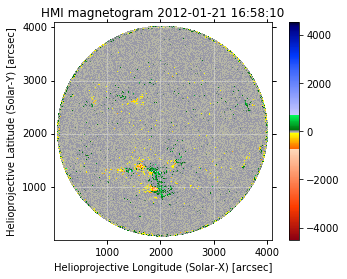

In [6]:
import sunpy.map
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u#import sunpy.data.sample
import matplotlib.colors as colors
import matplotlib.pyplot as plt
filename = "HMI.m2012.01.21_17.00.00.fits"
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
smap = sunpy.map.Map(filename)
#fig = plt.figure()
cmap = plt.get_cmap('hmimag')

fig = plt.figure()
ax = plt.subplot(projection=wcs)
ax.coords.grid(True, color='white', ls='solid')
#smap.plot(norm=colors.LogNorm())
smap.plot(cmap=cmap)
# aia_rot = smap.rotate(45 * u.deg)
# aia_rot.plot()
plt.colorbar()
plt.savefig("filename.pdf", bbox_inches = 'tight',  pad_inches = 0)
plt.show()


In [5]:
import matplotlib.pyplot as plt
plt.savefig("filename.pdf", bbox_inches = 'tight',  pad_inches = 0)

<Figure size 432x288 with 0 Axes>

In [8]:
file = fits.open(filename)
_data = file[1].data
_data = _data[1024:3072, 1024:3072]
hdu = fits.PrimaryHDU(_data)
hdul = fits.HDUList([hdu])
hdul.writeto('new2.fits')

<class 'numpy.ndarray'>
(2048, 2048)


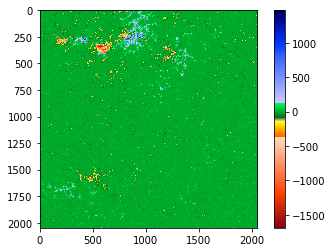

In [10]:
image_file = "new2.fits"
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)
plt.imshow(image_data, cmap='hmimag')
plt.colorbar()
plt.savefig("filename_1.pdf", bbox_inches = 'tight',  pad_inches = 0)

In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import datetime
from sunpy.io import jp2
import numpy as np
import os
import sys
from PIL import Image

/home/mhabeeb2/miniconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
pathofAIAFile = '/data/HMI_Fits/files-all.txt'

In [3]:
#Importing the file
df = pd.read_csv(pathofAIAFile, sep=" ", header=None)
df.columns = ['path']
df

,path
0,./2010/06/HMI.m2010.06.05_22.00.00.fits
1,./2010/06/HMI.m2010.06.29_23.00.00.fits
2,./2010/06/HMI.m2010.06.10_12.00.00.fits
3,./2010/06/HMI.m2010.06.30_21.00.00.fits
4,./2010/06/HMI.m2010.06.25_11.00.00.fits
...,...
78301,./2012/05/HMI.m2012.05.01_09.00.00.fits
78302,./2012/05/HMI.m2012.05.13_21.00.00.fits
78303,./2012/05/HMI.m2012.05.06_11.00.00.fits
78304,./2012/05/HMI.m2012.05.26_22.00.00.fits


In [4]:
#Removing the links which don't have .fits extension
df['isFile'] = df['path'].progress_apply(lambda x: True if '.fits' in x else False)
img = df[df.isFile == True]

100%|██████████| 78306/78306 [00:00<00:00, 605210.32it/s]


In [5]:
#Adding /data/AIA to complete the path 
img['path'] = img['path'].progress_apply(lambda x: x.replace('./', '/data/HMI_Fits/'))

100%|██████████| 78263/78263 [00:00<00:00, 669566.13it/s]
/home/mhabeeb2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:

img

,path,isFile
0,/data/HMI_Fits/2010/06/HMI.m2010.06.05_22.00.0...,True
1,/data/HMI_Fits/2010/06/HMI.m2010.06.29_23.00.0...,True
2,/data/HMI_Fits/2010/06/HMI.m2010.06.10_12.00.0...,True
3,/data/HMI_Fits/2010/06/HMI.m2010.06.30_21.00.0...,True
4,/data/HMI_Fits/2010/06/HMI.m2010.06.25_11.00.0...,True
...,...,...
78301,/data/HMI_Fits/2012/05/HMI.m2012.05.01_09.00.0...,True
78302,/data/HMI_Fits/2012/05/HMI.m2012.05.13_21.00.0...,True
78303,/data/HMI_Fits/2012/05/HMI.m2012.05.06_11.00.0...,True
78304,/data/HMI_Fits/2012/05/HMI.m2012.05.26_22.00.0...,True


In [7]:
#b = img['year'].unique()
img['year']= img['path'].progress_apply(lambda x: x.split("HMI_Fits/")[1][0:4])
img['notYear'] = img['year'].progress_apply(lambda x: True if x in 'BadFits' else False)
img['notYear'] = img['year'].progress_apply(lambda x: True if x in "synt" else False)
searchfor = ['BadF', 'synt']
newdf = img[~img.year.str.contains('|'.join(searchfor))]
newdf['year'].unique()

100%|██████████| 78263/78263 [00:00<00:00, 520164.76it/s]
/home/mhabeeb2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 78263/78263 [00:00<00:00, 1046386.64it/s]
/home/mhabeeb2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 78263/78263 [00:00<00:00, 1062745.85it/s]
/home

array(['2010', '2017', '2013', '2019', '2014', '2016', '2011', '2015',
       '2018', '2012'], dtype=object)

In [8]:
final = newdf[['path']]
final = final.reset_index(drop=True)
#final.to_csv('FITS_image_data.csv', sep='\t', index=False)
final

,path
0,/data/HMI_Fits/2010/06/HMI.m2010.06.05_22.00.0...
1,/data/HMI_Fits/2010/06/HMI.m2010.06.29_23.00.0...
2,/data/HMI_Fits/2010/06/HMI.m2010.06.10_12.00.0...
3,/data/HMI_Fits/2010/06/HMI.m2010.06.30_21.00.0...
4,/data/HMI_Fits/2010/06/HMI.m2010.06.25_11.00.0...
...,...
76237,/data/HMI_Fits/2012/05/HMI.m2012.05.01_09.00.0...
76238,/data/HMI_Fits/2012/05/HMI.m2012.05.13_21.00.0...
76239,/data/HMI_Fits/2012/05/HMI.m2012.05.06_11.00.0...
76240,/data/HMI_Fits/2012/05/HMI.m2012.05.26_22.00.0...


4096


/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.


nan

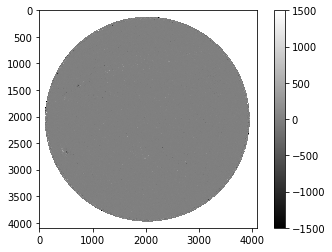

In [35]:
from astropy.io import fits
import torch
import numpy as np
from collections import Counter
import pandas
from astropy.io import fits
import matplotlib.pyplot as plt
filepath = final.iloc[0]['path']
img = fits.open(filepath)
data_a = img[0].data
#where_are_NaNs = np.isnan(data_a)
#data_a[where_are_NaNs] = 0
data_a = np.clip(data_a,-1500,1500)
print(data_a.shape[1])
plt.imshow(data_a, cmap='gray')
plt.colorbar()
def load_img(filepath):
    image_data = fits.getdata(filepath)
    data = image_data.astype(np.float32)
    a = torch.from_numpy(data)
    where_are_NaNs = np.isnan(a)
    a[where_are_NaNs] = 0
    a = torch.clamp(a,-1500,1500)
    return a
a = load_img(filepath)
data_a.max()

In [9]:
from astropy.io import fits
import torch
import numpy as np
from collections import Counter
import pandas
def load_img(filepath):
    image_data = fits.getdata(filepath)
    data = image_data.astype(np.float32)
    a = torch.from_numpy(data)
    where_are_NaNs = np.isnan(a)
    a[where_are_NaNs] = 0
    
    return a
#for i in range()
filepath = final.iloc[0]['path']
a = load_img(filepath)
lis = [element.item() for element in a.flatten()]
counts,values = pd.Series(lis).value_counts().values, pd.Series(lis).value_counts().index
df_results = pd.DataFrame(list(zip(values,counts)),columns=["value","count"])
df_results.describe()
#for i in range(1,2):
#    filepath = final.iloc[i]['path']
#    a = load_img(filepath)
#    lis.append([element.item() for element in a.flatten()])
#pd.Series(lis).value_counts().plot(kind = 'hist')
#letter_counts = Counter(lis)
#df = pandas.DataFrame.from_dict(letter_counts, orient='index')
#df.plot(kind='bar')

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.


KeyboardInterrupt: 

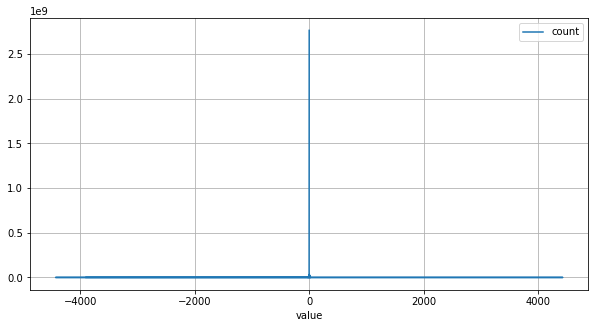

In [32]:
counts,values = pd.Series(lis).value_counts().values, pd.Series(lis).value_counts().index
df_results = pd.DataFrame(list(zip(values,counts)),columns=["value","count"])
df_results.set_index('value').plot(figsize=(10,5), grid=True)

In [39]:
print(len(lis))
data = pd.DataFrame(lis) 
print(data)
stat = data.describe()
stat

8858370048
              0
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
8858370043  0.0
8858370044  0.0
8858370045  0.0
8858370046  0.0
8858370047  0.0

[8858370048 rows x 1 columns]


,0
count,8.858370e+09
mean,-2.971353e-02
std,3.042833e+01
min,-4.433600e+03
25%,-2.500000e+00
50%,0.000000e+00
75%,2.500000e+00
max,4.433600e+03


In [34]:
jj = set(lis)
jj

{0.0,
 0.5,
 2.9000000953674316,
 2.700000047683716,
 2.5999999046325684,
 5.199999809265137,
 5.900000095367432,
 6.800000190734863,
 7.099999904632568,
 9.600000381469727,
 0.30000001192092896,
 10.199999809265137,
 12.5,
 10.300000190734863,
 14.300000190734863,
 15.199999809265137,
 16.0,
 15.300000190734863,
 9.300000190734863,
 19.100000381469727,
 20.600000381469727,
 19.200000762939453,
 20.799999237060547,
 23.700000762939453,
 24.700000762939453,
 25.799999237060547,
 23.600000381469727,
 26.700000762939453,
 28.600000381469727,
 28.5,
 30.899999618530273,
 31.299999237060547,
 32.599998474121094,
 33.900001525878906,
 34.29999923706055,
 35.599998474121094,
 36.900001525878906,
 36.099998474121094,
 37.0,
 39.29999923706055,
 40.70000076293945,
 37.599998474121094,
 39.0,
 34.099998474121094,
 44.400001525878906,
 45.5,
 46.5,
 45.599998474121094,
 48.79999923706055,
 8.399999618530273,
 8.0,
 51.0,
 52.29999923706055,
 52.900001525878906,
 54.0,
 54.099998474121094,
 54.299

In [25]:
df_results = df_results.drop(df_results.index[0])
print(df_results)
#df_results.set_index('value').plot(figsize=(10,5), grid=True)

            value  count
1        0.200000  67035
2       -0.300000  66852
3       -0.500000  66771
4        0.400000  66749
5        0.700000  66706
...           ...    ...
17236  989.599976      1
17237  989.400024      1
17238  988.900024      1
17239  988.799988      1
17240 -259.500000      1

[17240 rows x 2 columns]


list

In [29]:
#jj = set(lis)
fresh = []
for i in range(1,76241):
    filepath = final.iloc[i]['path']
    a = load_img(filepath)
    fresh = [element.item() for element in a.flatten()]
    lis = lis+fresh

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/pytorch/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype

KeyboardInterrupt: 

In [1]:
len(lis)

NameError: name 'lis' is not defined

In [22]:
#Convert text to datetime
def timefunc(time):
    t = datetime.datetime.strptime(time, "%Y_%m_%d__%H_%M_%S_%f")
    t2 = datetime.datetime.isoformat(t)
    return t2

In [23]:
keep['time'] = keep.imagetime.progress_apply(lambda x: timefunc(x))

100%|██████████| 1530603/1530603 [00:21<00:00, 72673.51it/s]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
aia = keep[['imageid', 'wavelength', 'path', 'time']]

In [26]:
aia.columns = ['image_id', 'image_wavelength', 'image_path', 'image_time']

In [27]:
aia = aia.reset_index(drop=True)

In [28]:
aia.to_csv('aia_image_data.csv', sep='\t', index=False)